In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

def Watershed(img, isGray):

    if(isGray == True):
        img1 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
        gray = img
    else:
        img1 = img
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    ret, bin_img = cv2.threshold(gray,
                                0, 255, 
                                cv2.THRESH_OTSU)
    imshow(bin_img)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

    bin_img = cv2.morphologyEx(bin_img, 
                            cv2.MORPH_OPEN,
                            kernel,
                            iterations=2)
    imshow(bin_img)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

    sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
    imshow(sure_bg, axes[0,0])
    axes[0, 0].set_title('Sure Background')
    
    dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
    imshow(dist, axes[0,1])
    axes[0, 1].set_title('Distance Transform')

    ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
    sure_fg = sure_fg.astype(np.uint8)  
    imshow(sure_fg, axes[1,0])
    axes[1, 0].set_title('Sure Foreground')

    unknown = cv2.subtract(sure_bg, sure_fg)
    imshow(unknown, axes[1,1])
    axes[1, 1].set_title('Unknown')
    
    plt.show()

    ret, markers = cv2.connectedComponents(sure_fg)
    
    markers += 1
    markers[unknown == 255] = 0
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.imshow(markers, cmap="tab20b")
    ax.axis('off')
    plt.show()
    markers = cv2.watershed(img1, markers)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(markers, cmap="tab20b")
    ax.axis('off')
    plt.show()
    
    labels = np.unique(markers)
    
    coins = []
    for label in labels[2:]:  
    
        target = np.where(markers == label, 255, 0).astype(np.uint8)
        
        contours, hierarchy = cv2.findContours(
            target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )
        coins.append(contours[0])
    
    return cv2.drawContours(img1, coins, -1, color=(255, 0, 0), thickness=2)

1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

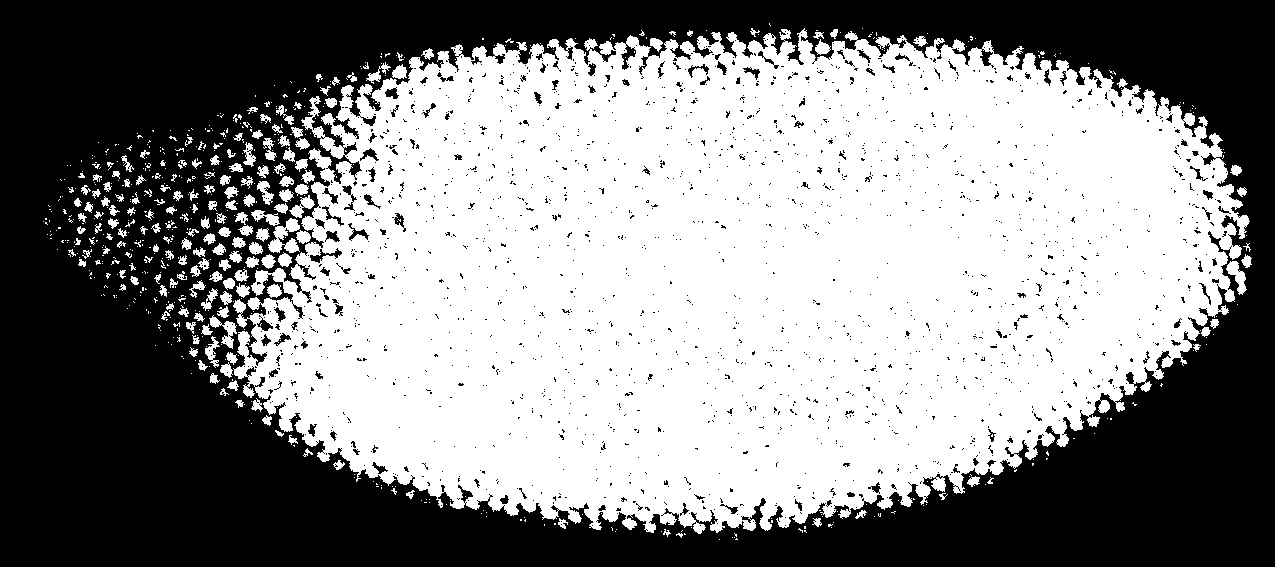

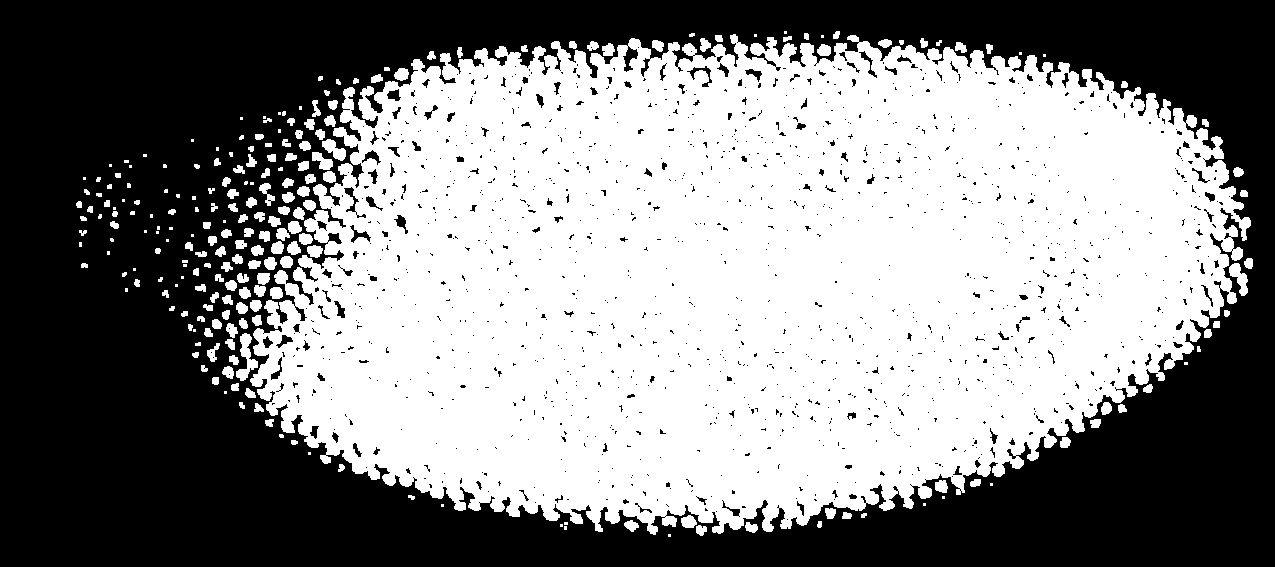

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


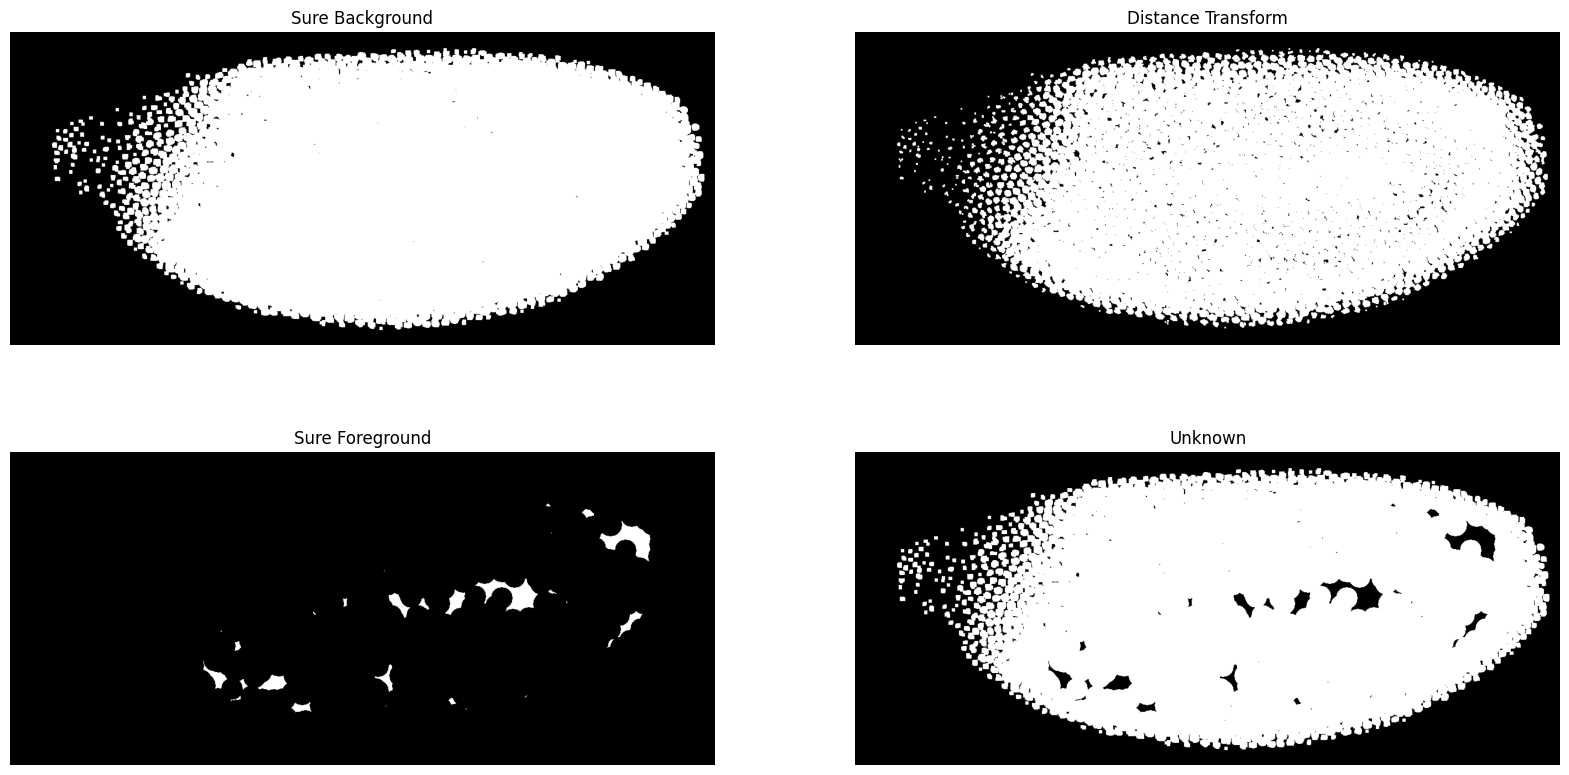

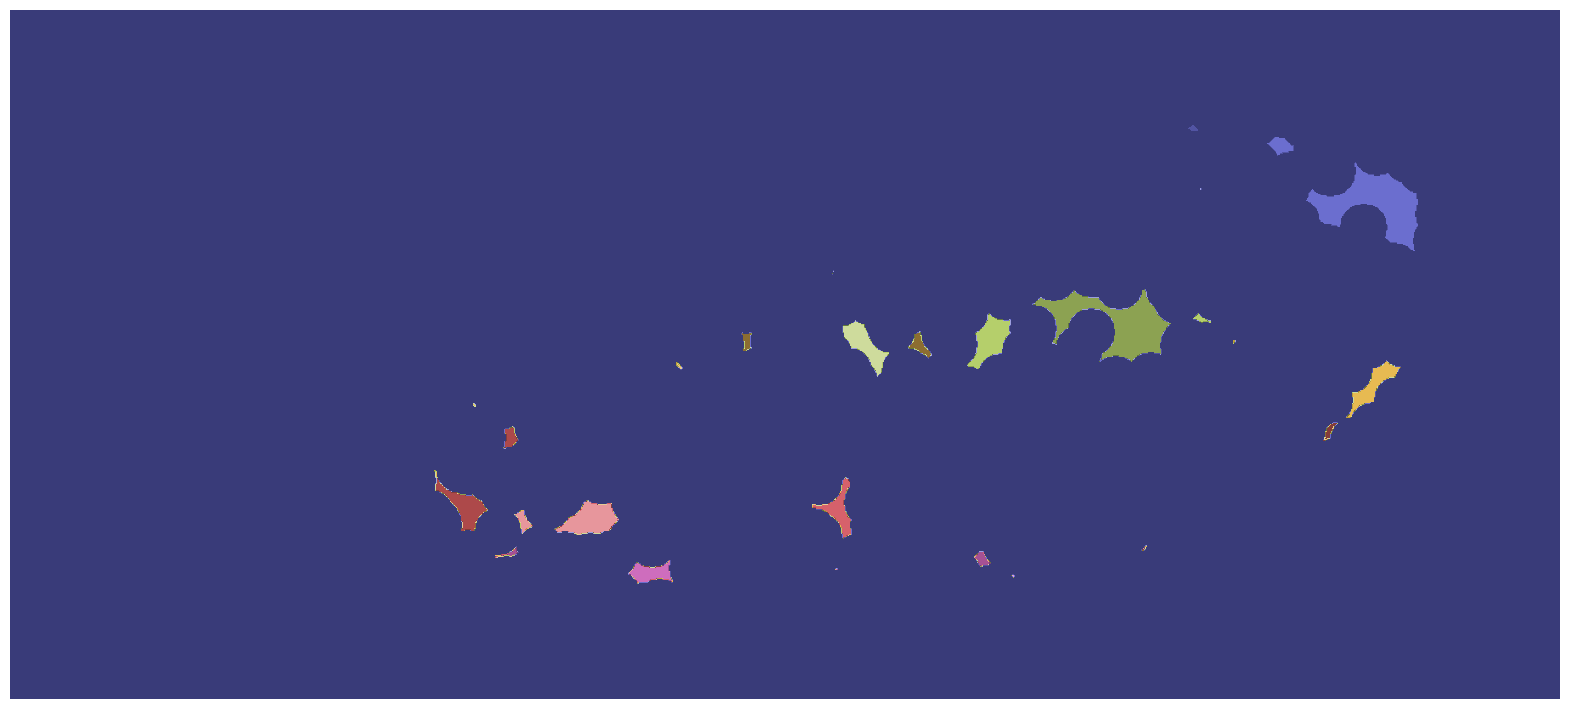

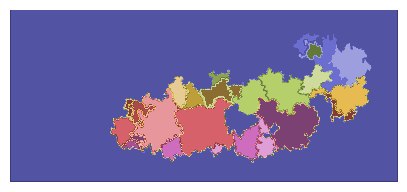

NameError: name 'img4' is not defined

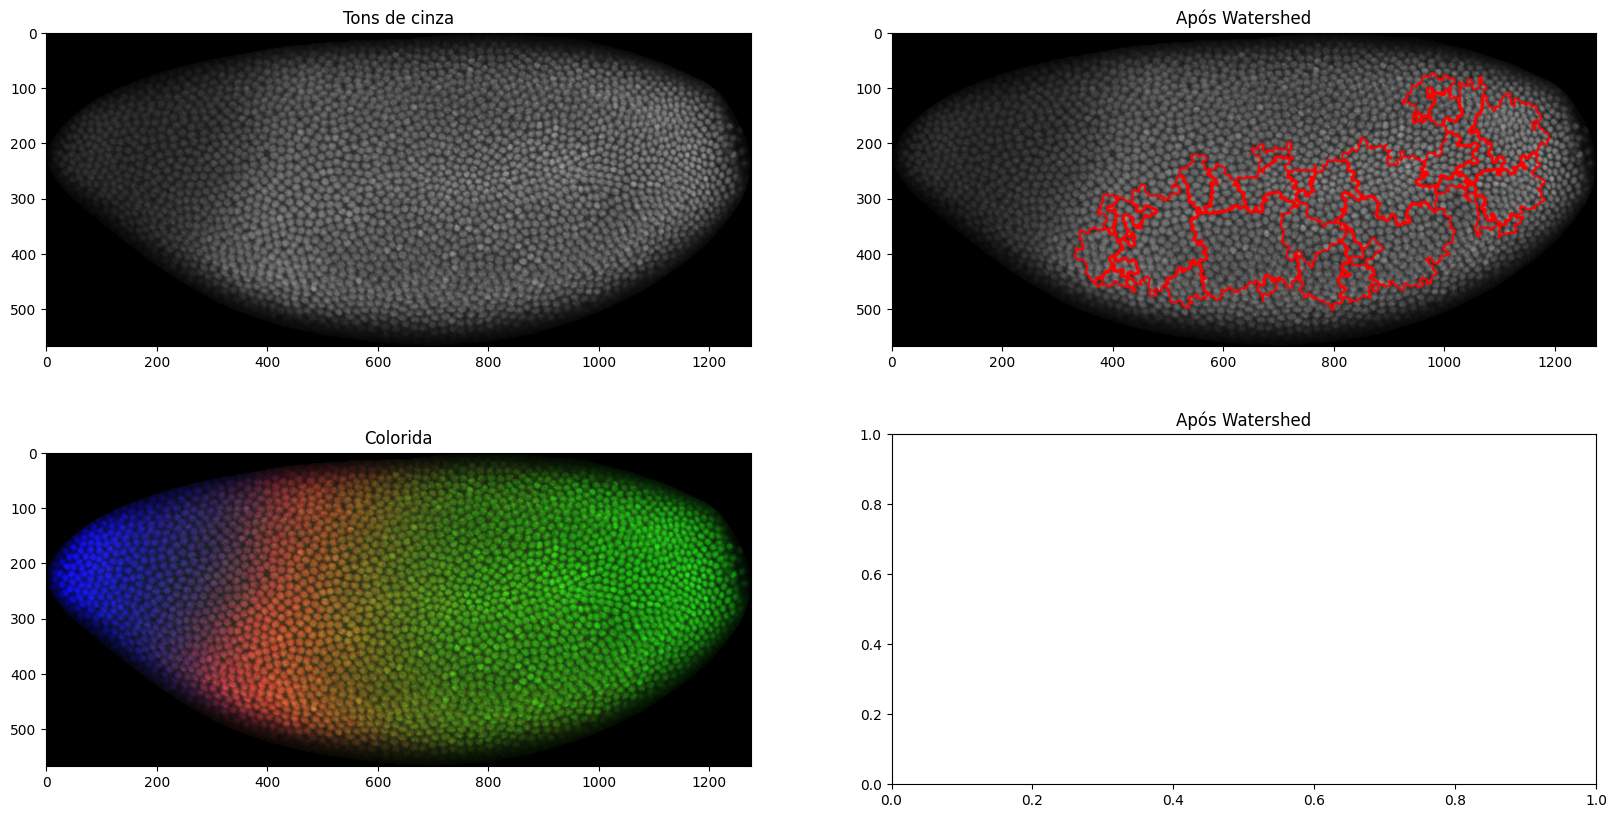

In [2]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

img2 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = Watershed(img1, True)
#img4 = Watershed(img2, False)

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title('Tons de cinza')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 2)
plt.title('Após Watershed')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 3)
plt.title('Colorida')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 4)
plt.title('Após Watershed')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

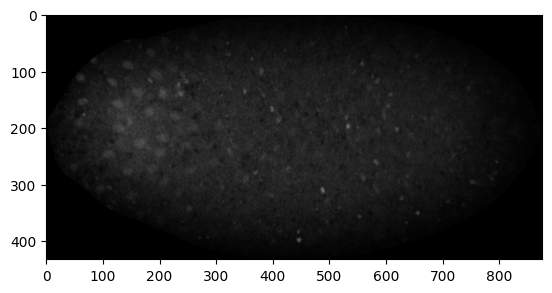

In [3]:
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

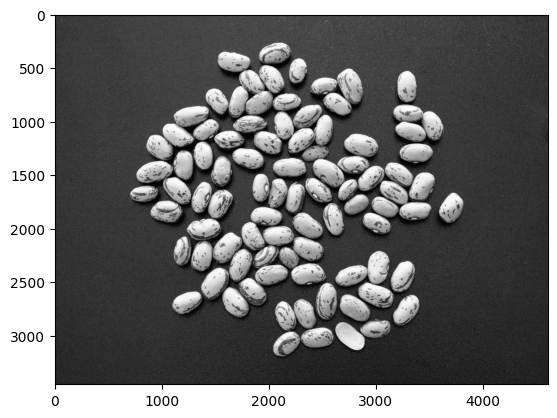

In [4]:
img3 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255)